# CS 4661: Introduction to Data Science Homework 3 Due Date: Fri, Nov 4

 Group Members:
1. Davis Louie 300101273
2. Kevin Huynh 302371646

## Question 1:

### a- Read the dataset file "Credit.csv" and assign it to a Pandas DataFrame

In [2]:
# importing numpy and pandas

import numpy as np
import pandas as pd

In [3]:
# reading the Credits.csv file and assigning it to a pandas dataframe

credit_df = pd.read_csv('C:/Users/TallGuy/Downloads/CS4661/HW3/Credit.csv')
credit_df.head() # printing the head of the dataframe

,Income,Limit,Rating,Cards,Age,Education,Married,Balance
0,14.891,3606,283,2,34,11,1,333
1,106.025,6645,483,3,82,15,1,903
2,104.593,7075,514,4,71,11,0,580
3,148.924,9504,681,3,36,11,0,964
4,55.882,4897,357,2,68,16,1,331


### c- Generate the feature matrix and target vector (target is “balance” in this dataset). Then, normalize (scale) the features.

In [4]:
# generating the feature matrix

feature_cols = ['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Married']
X = credit_df[feature_cols]
X.head() # printing the head of the feature matrix

,Income,Limit,Rating,Cards,Age,Education,Married
0,14.891,3606,283,2,34,11,1
1,106.025,6645,483,3,82,15,1
2,104.593,7075,514,4,71,11,0
3,148.924,9504,681,3,36,11,0
4,55.882,4897,357,2,68,16,1


In [5]:
# generating the target vector

Y = credit_df['Balance']
Y.head() # printing the head of the target vector

0    333
1    903
2    580
3    964
4    331
Name: Balance, dtype: int64

In [6]:
# normalizing the feature matrix

from sklearn import preprocessing

X_normal = preprocessing.scale(X)
print(X_normal) # displaying the normalized features

[[-0.86158299 -0.48999879 -0.46553881 ..., -1.2576741  -0.78492991
   0.79539491]
 [ 1.72743711  0.82826106  0.82870309 ...,  1.5284506   0.49658831
   0.79539491]
 [ 1.68675551  1.01478681  1.02931059 ...,  0.88996369 -0.78492991
  -1.25723711]
 ..., 
 [ 0.35946155 -0.24491264 -0.21963285 ...,  0.65778663 -0.46455035
   0.79539491]
 [-0.21280808 -0.95891584 -1.05441888 ..., -0.67723146 -0.1441708
   0.79539491]
 [-0.75334493  0.34199278  0.38866085 ...,  0.48365384 -2.06644812
  -1.25723711]]


### d- Split the dataset into testing and training sets with the following parameters: test_size=0.2, random_state=2.

In [7]:
# splitting the data so that 80% is in the training set and 20% is in the testing set.

from sklearn.cross_validation import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X_normal, Y, test_size=0.2, random_state=2)


### e- Use Linear Regression to train a linear model on the training set. Check the coefficients of the linear regression model. Which feature is the most important? Which feature is the least important?

In [8]:
# using linear regression to train the training set

from sklearn.linear_model import LinearRegression

my_linreg = LinearRegression() # instantiate an object of linear regression
my_linreg.fit(X_train, Y_train) # fitting the model to the training data
print(my_linreg.coef_) # printing the coefficients ('Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Married')

[-266.58857043  224.9727995   384.17073326   15.75381497  -17.93570224
    6.29572687  -23.60638685]


The feature that is most important is Rating since the magnitude is the greatest.
The feature that is least important is is Education since the magnitude is the closest to zero.

### f- Predict “balance” for the users in testing set. Then, compare the predicted balance with the actual balance by calculating and reporting the RMSE.

In [9]:
# making predictions on the testing set

y_predict_lin = my_linreg.predict(X_test)
print(y_predict_lin) # printing the predictions

[  187.83259081   696.19359653  1008.45870602   602.54553619  1005.89421809
   689.53276161   912.63981066   265.93761365   921.40430581  1097.28246448
   561.24806805   347.10203229   793.92182702   133.99552456   831.68509878
   154.29201659  1391.55139882  -127.61911507   946.8333401    719.02865483
   593.49954528    82.58696538    75.58160302   -69.92762404   480.22371194
  -153.93316298   290.58134942   588.66521868   908.95132202   887.83016569
  -215.31132242   421.56659575    31.96584993  -265.81389094   925.49231108
  1229.55288913   382.92814713   934.30680369  1763.56079475   845.73667161
   810.02069387   502.35960813   380.43477228   448.20831629   673.02981403
   492.00309225   589.86815721  1092.19775167   521.63311942   689.99089979
   799.4973836    265.38602315  1542.56678822  1188.82234981   303.81822799
   848.83393296  -152.65676468   634.77873681   266.10574461   828.42364016
   400.56060336   571.89835366   -15.19680339   982.77736906  -194.71974119
   751.71775

In [10]:
# Calculating the mean square error and the root mean square error

from sklearn import metrics

mse = metrics.mean_squared_error(Y_test, y_predict_lin)

rmse = np.sqrt(mse)

print('Root Mean Square Error: ' + str(rmse))

Root Mean Square Error: 154.410746767


### g- Now, use 10-fold Cross-Validation to evaluate the performance of a linear regression in predicting the balance. Thus, rather than splitting the dataset into testing and training, use Cross-Validation to evaluate the regression performance. What is the RMSE when you use cross validation?

In [11]:
# applying 10-fold cross-validation for linear regression classifer

from sklearn.cross_validation import cross_val_score

my_linreg.fit(X_normal, Y)
mse_list_cv = cross_val_score(my_linreg, X_normal, Y, cv=10, scoring='mean_squared_error')
print(mse_list_cv)

[-23646.90415343 -32003.04401232 -35462.64435619 -37327.60719635
 -14341.32205939 -33628.37104224 -31631.99317834 -12491.00334951
 -20749.61212175 -23204.94743459]


In [12]:
# changing the mean square values to positive and calculating the root mean square error.

mse_list_cv_pos = -mse_list_cv

rmse_list_cv = np.sqrt(mse_list_cv_pos)
print(rmse_list_cv)

[ 153.7754992   178.89394627  188.31527914  193.20353826  119.75525901
  183.38039983  177.85385343  111.76315739  144.04725656  152.331702  ]


In [13]:
# calculating the average RMSE

print('Average RMSE: ' + str(rmse_list_cv.mean()))

Average RMSE: 160.331989107


## Question 2:

In [14]:
# function to predict starting salary after graduation for technical and non-technical positions
# X1 is GPA, X2 is Age, and X3 is Type of Position(1 for Technical, 0 for Non-Technical)

def Target(X1, X2, X3):
    return 30 + 20 * X1 + 0.07 * X2 -30 * X3 + 0.01 * X1 * X2 + 10 * X1 * X3

In [17]:
# calculations for (PART A) showing cases with different gpa, but same age
# fixed gpa of 3.5 and age 22
print('With a GPA of 3.5 and Age of 22: ')
print('The starting salary of a Non-Technical Position: ' + str(Target(3.5, 22, 0)))
print('The starting salary of a Technical Position: ' + str(Target(3.5, 22, 1)))

# fixed gpa of 4.0 and age 22
print('With a GPA of 4.0 and Age of 22: ')
print('The starting salary of a Non-Technical Position: ' + str(Target(4.0, 22, 0)))
print('The starting salary of a Technical Position: ' + str(Target(4.0, 22, 1)))

# fixed gpa of 2.5 and age 22
print('With a GPA of 4.0 and Age of 22: ')
print('The starting salary of a Non-Technical Position: ' + str(Target(2.5, 22, 0)))
print('The starting salary of a Technical Position: ' + str(Target(2.5, 22, 1)))

With a GPA of 3.5 and Age of 22: 
The starting salary of a Non-Technical Position: 102.31
The starting salary of a Technical Position: 107.31
With a GPA of 4.0 and Age of 22: 
The starting salary of a Non-Technical Position: 112.42
The starting salary of a Technical Position: 122.42
With a GPA of 4.0 and Age of 22: 
The starting salary of a Non-Technical Position: 82.09
The starting salary of a Technical Position: 77.09


### a. (iii) For a fixed value of Age and GPA, Technical positions earn more on average than Non-Technical positions when the GPA is high enough.
iii is correct because with a fixed age and GPA, Technical positions will earn more on average when GPA is high enough.

The reason why Technical positions earn more on average is because of theta3 * X3 and theta5 * X1 * X3 where theta3 is -30 and theta5 is 10. Since theta3 is -30, when X3 is 1 (when you have a technical position) you lose 30 salary, but that does not apply when X3 is 0 (when you have a non-technical position). That doesn't seem fair to technical positions, but when you look at theta5 * X1 * X3, you see that theta5 is positive and the multiplier is GPA. Also, this portion of the model only applies to technical positions since X3 can only be 0 or 1. So that means you gain 10 times your GPA in salary. The higher your GPA is, the more money you will earn in a technical position.

Since you lose 30 in salary for automatically being in a technical field, we should find the break even point. The break even point is when your GPA is 3.0 since 10 times 3.0 is 30 and you lose 30 salary so you gain 0 salary for being in a technical field. That means if you have a GPA of 3.0, you will earn the same amount whether you are in a technical position or non-technical position.

### b. Predict the salary of a Technical and a Non-Technical positions with Age of 27, GPA of 4.0.

In [16]:
print('With a GPA of 4.0 and Age of 27: ')
print('The starting salary of a Non-Technical Position: ' + str(Target(4.0, 27, 0)))
print('The starting salary of a Technical Position: ' + str(Target(4.0, 27, 1)))

With a GPA of 4.0 and Age of 27: 
The starting salary of a Non-Technical Position: 112.97
The starting salary of a Technical Position: 122.97


## Question 3:

### a- Read the dataset file “Hearts_short.csv”, and assign it to a Pandas DataFrame.

In [38]:
# reading the Heart_short.csv file from my hard drive and assigning it to a pandas dataframe

hearts_df = pd.read_csv('C:/Users/TallGuy/Downloads/CS4661/HW3/Heart_short.csv')
hearts_df.head() # displaying the head of the heart_short dataframe

,Age,RestBP,Chol,RestECG,MaxHR,Oldpeak,AHD
0,63,145,233,2,150,2.3,No
1,67,160,286,2,108,1.5,Yes
2,67,120,229,2,129,2.6,Yes
3,37,130,250,0,187,3.5,No
4,41,130,204,2,172,1.4,No


### b- Generate the feature matrix and label vector (AHD). Then, normalize (scale) the features.

In [39]:
# creating the feature matrix

features_hd = ['Age', 'RestBP', 'Chol', 'RestECG', 'MaxHR', 'Oldpeak']
X3 = hearts_df[features_hd]
X3.head() # printing the head of the feature matrix

,Age,RestBP,Chol,RestECG,MaxHR,Oldpeak
0,63,145,233,2,150,2.3
1,67,160,286,2,108,1.5
2,67,120,229,2,129,2.6
3,37,130,250,0,187,3.5
4,41,130,204,2,172,1.4


In [40]:
# creating the label vector and changing the categorical feature into a numerical feature

def categorical_to_numerical(x):
    if x == 'Yes':
        return 1
    elif x == 'No':
        return 0
    
Y3 = hearts_df['AHD'].apply(categorical_to_numerical)
Y3.head() # displaying the head of the label vector

0    0
1    1
2    1
3    0
4    0
Name: AHD, dtype: int64

In [41]:
# normalizing the feature matrix

X3_normal = preprocessing.scale(X3)
print(X3_normal) # displaying the normalized features

[[ 0.94788279  0.74978425 -0.25859799  1.04743633 -0.00919313  1.13182982]
 [ 1.38542704  1.59842565  0.75330422  1.04743633 -1.84813139  0.43550978]
 [ 1.38542704 -0.6646181  -0.33496796  1.04743633 -0.92866226  1.39294984]
 ..., 
 [ 0.29156641 -0.09885716 -2.20603242 -0.96851989 -1.54164168  0.17438976]
 [ 0.29156641 -0.09885716 -0.2013205   1.04743633  1.04162873 -0.8700903 ]
 [-1.78676878  0.35375159 -1.36596267 -0.96851989  0.99784448 -0.8700903 ]]


### c- Split the dataset into testing and training sets with the following parameters: test_size=0.2, random_state=3.

In [42]:
# Splitting the data into 80% training and 20% testing with random state 3.

X3_train, X3_test, Y3_train, Y3_test = train_test_split(X3_normal, Y3, test_size=0.2, random_state=3)

### d- Use Logistic Regression Classifier to predict Heart Disease occurrence based on the training/testing datasets that you built in part(c). Then, compute and report the Accuracy.

In [43]:
# using the logistic regression classifier to predict heart disease

from sklearn.linear_model import LogisticRegression

my_logreg = LogisticRegression()
my_logreg.fit(X3_train, Y3_train) # fitting the training data
Y3_predict_lr = my_logreg.predict(X3_test) 
print(Y3_predict_lr) # displaying the heart disease prediction

[1 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 0 1 1 1 0 0 1 1
 0 1 1 0 1 0 0 1 1 0 0 1 0 0 1 0 1 0 0 0]


In [44]:
# computing the accuracy of the logistic regression classifier

from sklearn.metrics import accuracy_score

accuracy_score_lr = accuracy_score(Y3_test, Y3_predict_lr)

print('Accuracy of Logistic Regression Classifier: ' + str(accuracy_score_lr)) # displaying the accuracy of log reg classifier

Accuracy of Logistic Regression Classifier: 0.701754385965


### e- Now, Use Logistic Regression Classifier to predict the probability of Heart Disease based on the training/testing datasets that you built in part (c) (you have to use “my_logreg.predict_proba” method rather than “my_logreg.predict”). Then, Plot Roc Curve for this classifier, and also Compute the AUC (Area Under Curve for ROC).

In [46]:
# estimating the probability of each label

Y3_predict_lr_prob = my_logreg.predict_proba(X3_test)

#print(Y3_predict_lr_prob) # displaying the estimated likelihood of the labels
print(Y3_predict_lr_prob[:,1])

[ 0.50102546  0.44866578  0.56968509  0.61880501  0.14912372  0.23815782
  0.2450554   0.12969191  0.65523956  0.35138608  0.90041243  0.08129492
  0.71340004  0.5471148   0.32067845  0.13624307  0.89035019  0.34007876
  0.89394678  0.65044747  0.1260156   0.14429784  0.76590559  0.06775119
  0.87865977  0.42501833  0.29333296  0.56382476  0.33445983  0.20265605
  0.70266925  0.86865072  0.83743209  0.12011109  0.20825064  0.98822841
  0.93945121  0.24304704  0.8040581   0.51841253  0.30234292  0.71135238
  0.32218759  0.18056311  0.97041773  0.68476137  0.12500001  0.13377015
  0.64598572  0.36395134  0.38959662  0.80220778  0.03786847  0.77813521
  0.12824011  0.1834758   0.10598781]


In [47]:
# calculating and printing the true positive rate and the false positive rate

from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(Y3_test, Y3_predict_lr_prob[:,1], pos_label=1)

print('False Positive Rate: ' + str(fpr))
print('True Positive Rate: ' + str(tpr))

False Positive Rate: [ 0.          0.03333333  0.03333333  0.13333333  0.13333333  0.2         0.2
  0.26666667  0.26666667  0.4         0.4         0.5         0.5
  0.53333333  0.53333333  0.63333333  0.63333333  0.7         0.7
  0.73333333  0.73333333  0.76666667  0.76666667  0.8         0.8         1.        ]
True Positive Rate: [ 0.03703704  0.03703704  0.40740741  0.40740741  0.62962963  0.62962963
  0.66666667  0.66666667  0.7037037   0.7037037   0.74074074  0.74074074
  0.77777778  0.77777778  0.81481481  0.81481481  0.85185185  0.85185185
  0.88888889  0.88888889  0.92592593  0.92592593  0.96296296  0.96296296
  1.          1.        ]


In [48]:
# calculating and displaying the area under the curve

AUC = metrics.auc(fpr, tpr)
print('Area Under The Curve: ' + str(AUC))

Area Under The Curve: 0.753086419753


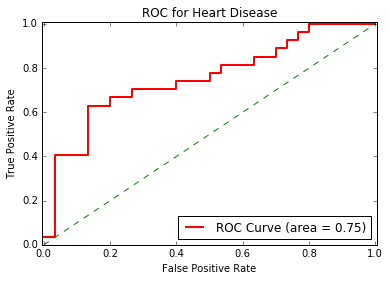

In [49]:
# graphing the receiver operating characteristic curve for heart disease

import matplotlib.pyplot as plt

%matplotlib inline
plt.figure()

# Roc Curve:
plt.plot(fpr, tpr, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='green', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Heart Disease')
plt.legend(loc="lower right")

plt.show()